## please refer 作者：台大電機二 劉記良 https://fgc.stpi.narl.org.tw/activity/videoDetail/4b1141305d9cd231015d9d03cfd10027
和台大李宏毅教授課程

第一步，我們要先將MNIST的資料載入，並且進行標準化(normalization)。

載入的x為大小為28*28的圖片共60000張，且每個像素的數值介於0~255之間，標準化後介於0~1之間。

載入的y為所對應的數字0~9，在這我們要運用keras中的np_utils.to_categorical將y轉成one-hot的形式，在這我們將他轉為一個10維的vector，

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils

def load_data():
        # 載入minst的資料
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
        # 將圖片轉換為一個60000*784的向量，並且標準化
    x_train = x_train.reshape(x_train.shape[0], 28*28)
    x_test = x_test.reshape(x_test.shape[0], 28*28)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train = x_train/255
    x_test = x_test/255
    # 將y轉換成one-hot encoding 
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    # 回傳處理完的資料
    return (x_train, y_train), (x_test, y_test)

Using TensorFlow backend.


第二步，讀完MNIST的資料後，我們就可以來開始搭建我們的神經網路了，這裡以最簡單的DNN (deep neural network) 作為範例。

Keras的核心為模型，最主要也是最常使用的是Sequential這個模型，Sequential可以讓我們按照順序的將神經網路串起。

運用.add()我們可以一層一層的將神經網路疊起。在每一層之中我們只需要簡單的設定每層的大小(units)與激活函數(activation function)。
需要特別記得的是：第一層要記得寫輸入的向量大小、最後一層的units要等於輸出的向量大小。

在這邊我們最後一層使用的激活函數(activation function)為softmax。

In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import  Adam

def build_model():
        #建立模型
        model = Sequential()
        #將模型疊起unit為有幾個neural network，Dense為fully connect neural network
        model.add(Dense(input_dim=28*28,units=200,activation='relu'))
        model.add(Dense(units=500,activation='relu'))
        model.add(Dense(units=500,activation='relu'))
        #model.add(Dense(units=200,activation='relu'))
        model.add(Dense(units=10,activation='softmax'))
        model.summary()
        return model

第三步，疊完模型後我們就可以開始訓練模型了。
在此我們使用了Adam做為我們的優化器，loss function選用了categorical_crossentropy。

In [26]:
(x_train,y_train),(x_test,y_test)=load_data()
model = build_model()
#開始訓練模型configuration
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
#model_history = model.fit(x_train,y_train)
#pick the best function
model_history = model.fit(x_train,y_train,batch_size=100,epochs=20)

#model_history = model.fit(x_train,y_train,batch_size=100,epochs=20,validation_data=(x_test, y_test),
#          shuffle=True)
#顯示訓練結果
score = model.evaluate(x_train,y_train)
print ('\nTrain Acc:', score[1])
score = model.evaluate(x_test,y_test)
print ('\nTest Acc:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_48 (Dense)             (None, 500)               100500    
_________________________________________________________________
dense_49 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_50 (Dense)             (None, 10)                5010      
Total params: 513,010
Trainable params: 513,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 6s - loss: 0.2338 - acc: 0.9292     
Epoch 2/20
60000/60000 [==============================] - 6s - loss: 0.0899 - acc: 0.9727     
Epoch 3/20
60000/60000 [==============================] - 6s - loss: 0.0631 - 

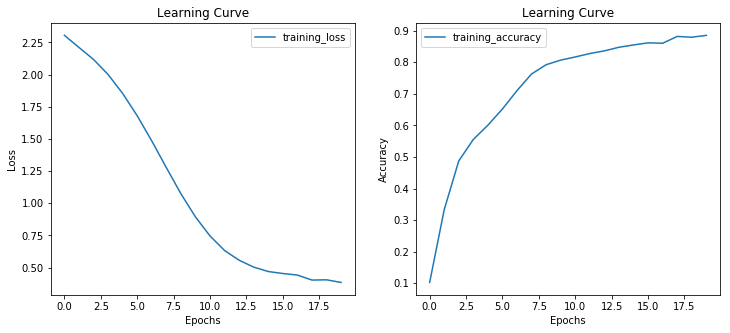

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
training_loss = model_history.history['loss']
#testing_loss = model_history.history['val_loss']
training_acc = model_history.history['acc']
#testing_acc = model_history.history['val_acc']

plt.subplot(121)
plt.plot(training_loss, label="training_loss")
#plt.plot(testing_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')

plt.subplot(122)

plt.plot(training_acc, label="training_accuracy")
#plt.plot(testing_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')

plt.show()

In [30]:
result = model.predict(x_test)
print (result, y_test)

[[  3.04069107e-13   3.72977565e-10   2.83229711e-12 ...,   9.99998450e-01
    1.64231302e-11   1.49955838e-06]
 [  9.19522768e-16   1.56180583e-15   1.00000000e+00 ...,   5.44252649e-17
    2.12295917e-16   5.48041164e-21]
 [  1.19822303e-11   1.00000000e+00   5.63619151e-10 ...,   1.22144534e-08
    5.80789061e-09   8.21212681e-11]
 ..., 
 [  1.25786924e-12   7.09255950e-13   6.29949330e-15 ...,   3.89585586e-10
    2.38012787e-09   6.96111542e-08]
 [  4.14107589e-15   1.07051151e-18   1.51407209e-22 ...,   2.62282362e-17
    1.58653785e-10   2.82186139e-20]
 [  3.00912610e-16   6.17765583e-21   2.20656159e-22 ...,   6.26310685e-27
    6.58184106e-17   6.80701196e-23]] [[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


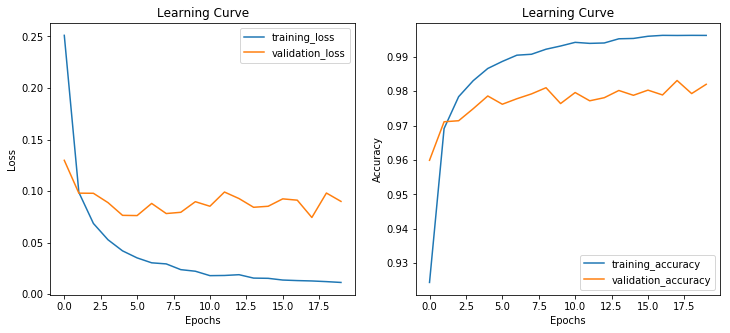

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
training_loss = model_history.history['loss']
testing_loss = model_history.history['val_loss']
training_acc = model_history.history['acc']
testing_acc = model_history.history['val_acc']

plt.subplot(121)
plt.plot(training_loss, label="training_loss")
plt.plot(testing_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')

plt.subplot(122)

plt.plot(training_acc, label="training_accuracy")
plt.plot(testing_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')

plt.show()